In [351]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [353]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [355]:
path = r'C:\Users\hp\Olist_Project\02 Data\Prepared Data'

In [357]:
# Import the dataset

df = pd.read_csv(os.path.join(path, 'merged_all.csv'))

In [358]:
df.columns

Index(['Unnamed: 0', 'customer_id', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'order_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_score',
       'review_creation_date', 'review_answer_timestamp',
       'product_name_length', 'product_description_length',
       'product_photos_qty', 'product_weight_grms', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state',
       'product_category_name_english'],
      dtype='object')

In [359]:
# Drop duplicate column from df_order_payments
df = df.drop('Unnamed: 0', axis=1)


In [360]:
df['order_purchase_timestamp']

0           2017-05-16 15:05:35
1           2017-05-16 15:05:35
2           2017-05-16 15:05:35
3           2017-05-16 15:05:35
4           2017-05-16 15:05:35
                   ...         
11845467    2017-12-19 14:27:23
11845468    2017-12-19 14:27:23
11845469    2017-12-19 14:27:23
11845470    2017-12-19 14:27:23
11845471    2017-12-19 14:27:23
Name: order_purchase_timestamp, Length: 11845472, dtype: object

In [361]:
# Convert to datetime
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_purchase_hour'] = df['order_purchase_timestamp'].dt.hour
df['order_purchase_month'] = df['order_purchase_timestamp'].dt.month
df['order_purchase_timestamp'] = df['order_purchase_timestamp'].dt.date

In [362]:
df['order_purchase_timestamp']

0           2017-05-16
1           2017-05-16
2           2017-05-16
3           2017-05-16
4           2017-05-16
               ...    
11845467    2017-12-19
11845468    2017-12-19
11845469    2017-12-19
11845470    2017-12-19
11845471    2017-12-19
Name: order_purchase_timestamp, Length: 11845472, dtype: object

In [363]:
df_numeric = df[['order_purchase_timestamp', 'payment_value']]

In [364]:
df_numeric.head()

,order_purchase_timestamp,payment_value
0,2017-05-16,146.87
1,2017-05-16,146.87
2,2017-05-16,146.87
3,2017-05-16,146.87
4,2017-05-16,146.87


In [375]:
df_numeric.shape

(11845472, 2)

In [377]:
df_numeric.head()

,order_purchase_timestamp,payment_value
0,2017-05-16,146.87
1,2017-05-16,146.87
2,2017-05-16,146.87
3,2017-05-16,146.87
4,2017-05-16,146.87


In [395]:
df_numeric.columns

Index(['order_purchase_timestamp', 'payment_value'], dtype='object')

In [397]:
# Convert 'order_purchase_timestamp' to datetime
df_numeric['order_purchase_timestamp'] = pd.to_datetime(df_numeric['order_purchase_timestamp'])


In [399]:
df_numeric.columns


Index(['order_purchase_timestamp', 'payment_value'], dtype='object')

In [403]:
# Set 'order_purchase_timestamp' as index
df_numeric.set_index('order_purchase_timestamp', inplace=True)



In [405]:
df_numeric.columns


Index(['payment_value'], dtype='object')

In [407]:
type(df_numeric)

pandas.core.frame.DataFrame

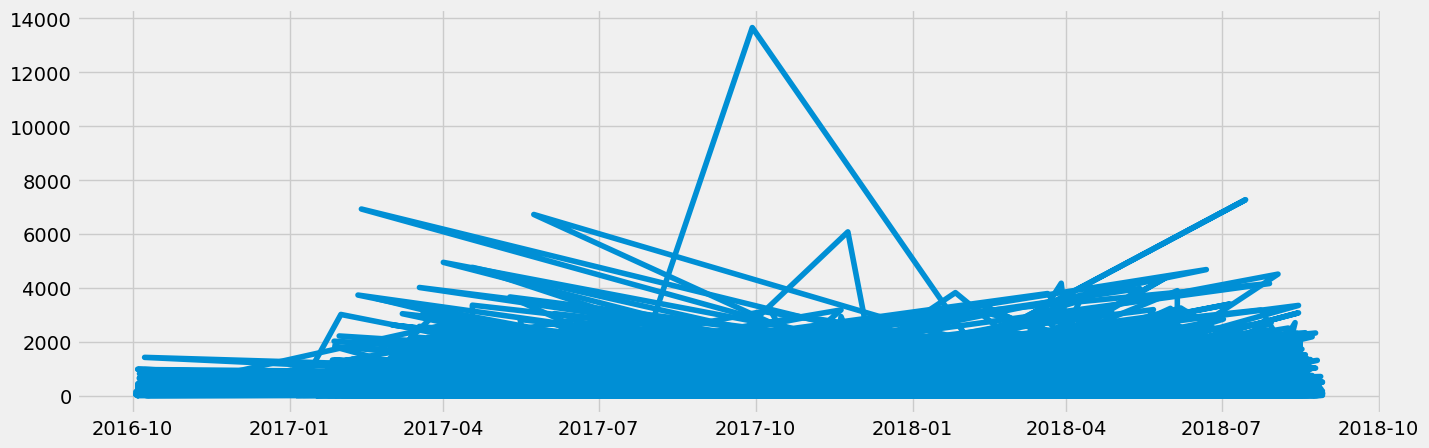

In [409]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(df_numeric)

In [411]:
df_grouped = df_numeric.groupby('order_purchase_timestamp')['payment_value'].sum().reset_index()


In [415]:
df_grouped.head(50)

,order_purchase_timestamp,payment_value
0,2016-10-03,119649.80
1,2016-10-04,1575067.09
2,2016-10-05,1547269.69
3,2016-10-06,692033.09
4,2016-10-07,879127.46
5,2016-10-08,883668.25
6,2016-10-09,474027.40
7,2016-10-10,482759.60
8,2016-12-23,2923.38
9,2017-01-05,84744.17


In [417]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(df_grouped)

Error in callback <function _draw_all_if_interactive at 0x00000147D2A69F80> (for post_execute), with arguments args (),kwargs {}:


ValueError: Date ordinal -1962718.2465 converts to -3404-04-04T18:05:02.400000 (using epoch 1970-01-01T00:00:00), but Matplotlib dates must be between year 0001 and 9999.

ValueError: Date ordinal -1962718.2465 converts to -3404-04-04T18:05:02.400000 (using epoch 1970-01-01T00:00:00), but Matplotlib dates must be between year 0001 and 9999.

<Figure size 1500x500 with 1 Axes>

In [419]:
# Set 'order_purchase_timestamp' as index
df_grouped.set_index('order_purchase_timestamp', inplace=True)


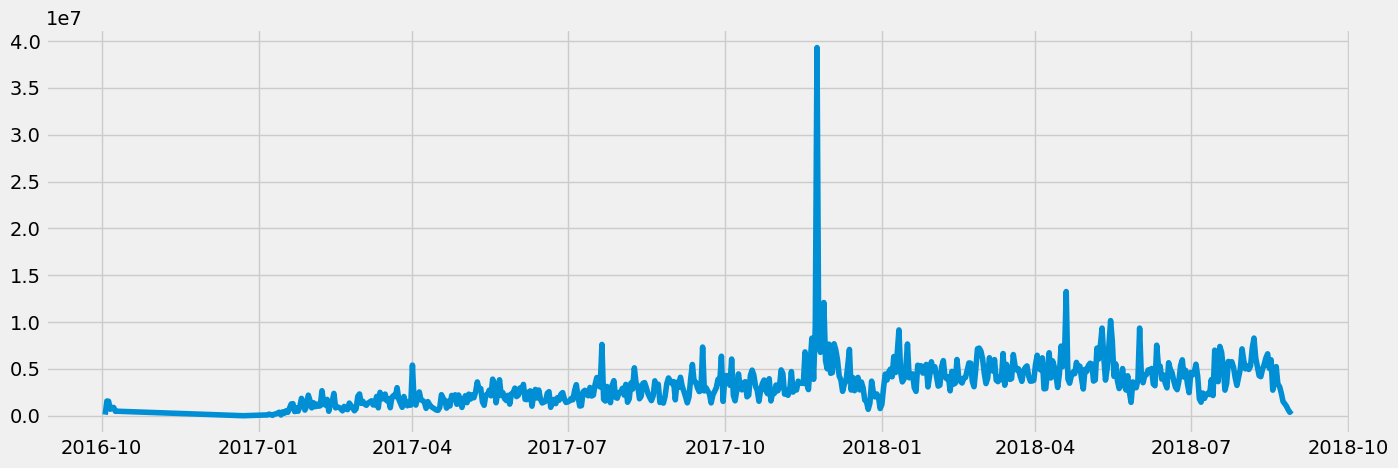

In [421]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(df_grouped)

In [425]:
# Check for missing values (you shouldn't have any)

df_grouped.isnull().sum()

payment_value    0
dtype: int64

In [427]:
# Check for duplicates

dups = df_grouped.duplicated()
dups.sum()

# No dups!

0

### 3. Time-series analysis: decomposition

In [434]:
# Decompose the time series using an additive model
import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(df_grouped, model='additive', period = 12)

In [436]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

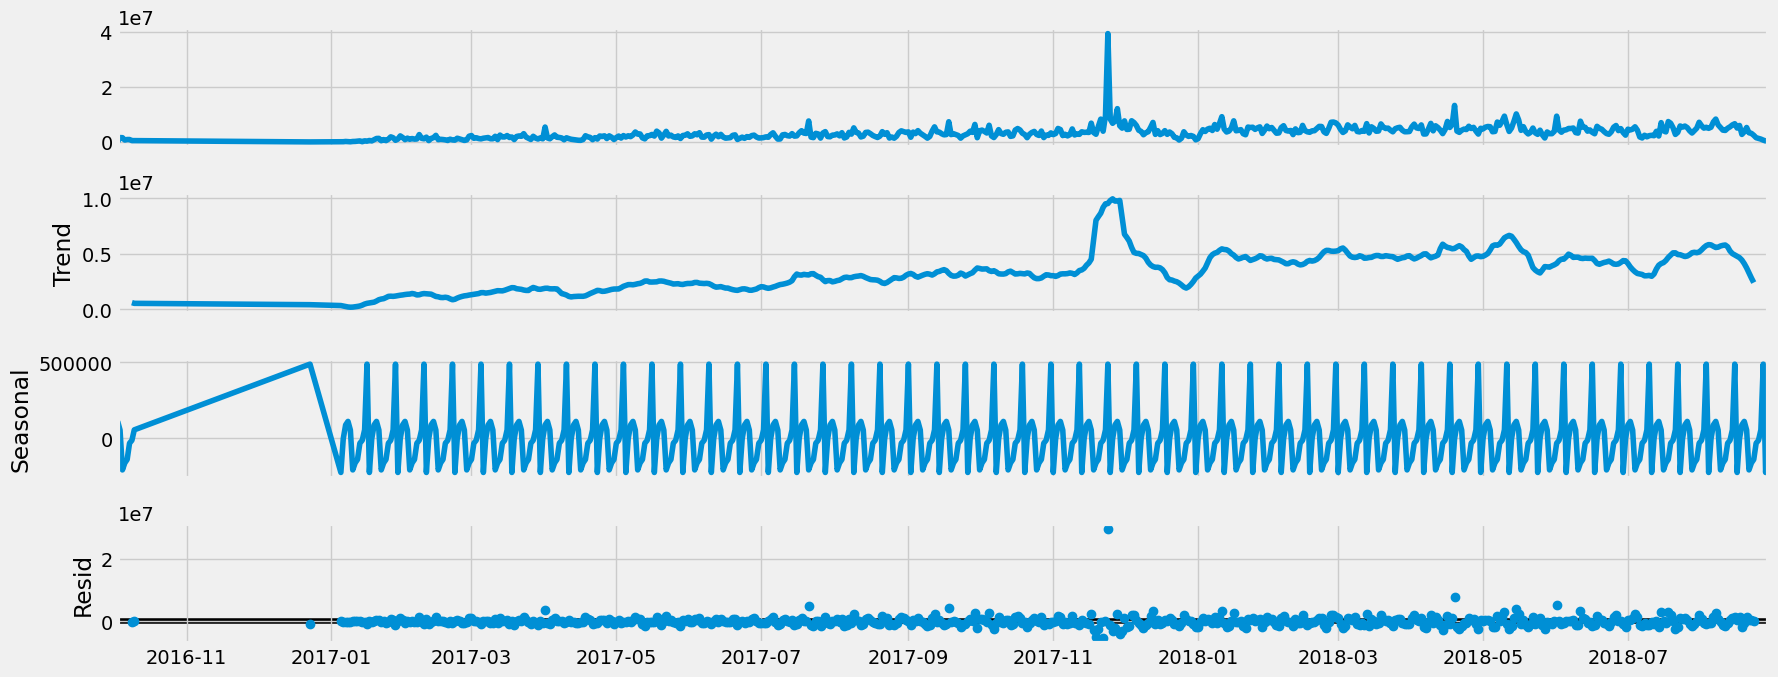

In [438]:
# Plot the separate components

decomposition.plot()
plt.show()

### 4. Testing for stationarity

In [443]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_grouped['payment_value'])

Dickey-Fuller Stationarity test:
Test Statistic                  -3.668958
p-value                          0.004572
Number of Lags Used              6.000000
Number of Observations Used    604.000000
Critical Value (1%)             -3.441223
Critical Value (5%)             -2.866337
Critical Value (10%)            -2.569325
dtype: float64


In [447]:
#### Test Statistic is smaller than all the critical value. Test statistic smaller than critical value = can reject null hypothesis as there is no root.

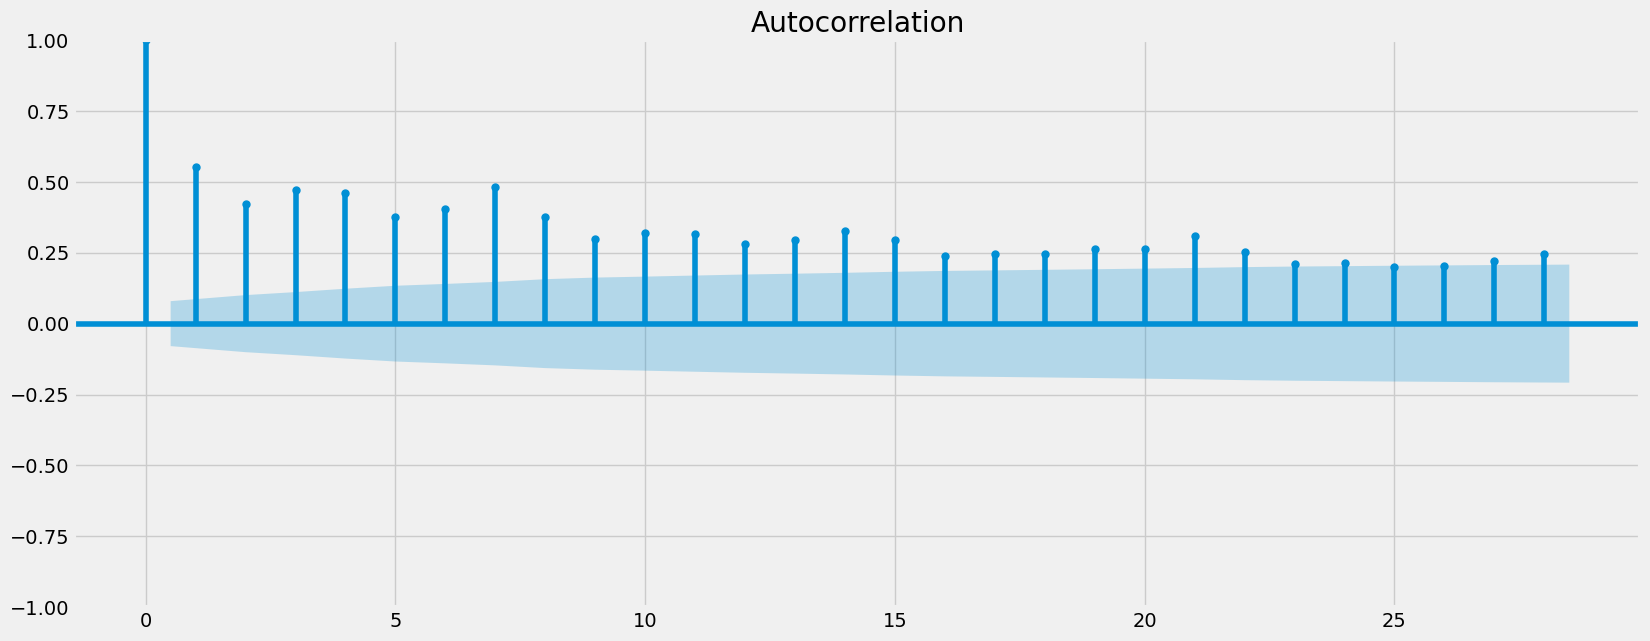

In [445]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_grouped)
plt.show()